# ELE 535 Lab 1

### Due : 9/26/2016 11:59 PM

### Importing required Python packages

In [70]:
# Import additional packages if needed.
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Part 1: Getting started with Numpy 

1) Create a 5 x 5 array (A) with random values sampled from Gaussian distribution with zero mean and unit variance. Then print A. Suggestion: numpy has a built-in command for generating random arrays.

In [71]:
N = 5 #matrix size is N * N
Mean = 0
Sigma = 1
# np.random.randn generate the random arrays with 0 mean and 1 variance
A = Sigma * np.random.randn(5,5) + Mean
print A

[[ 1.89580559 -0.19400385  0.33157987  0.24788556 -0.72035149]
 [ 0.00835651 -0.95328769  0.37163813 -0.40066056  0.0975952 ]
 [ 0.6489472   0.46589957  1.05899384 -0.04702012 -0.65829228]
 [ 1.62833539 -1.24224792  0.43571152 -1.89789347  0.51050879]
 [ 1.55169835  0.10280158  0.50940151  0.84264462 -0.5571481 ]]


2) Set the element in the $2^{nd}$ row and $3^{rd}$ column of A to be 1 and print the result. Suggestion: check out how to index the elements of a numpy array.

In [72]:
#element in array indexed from 0
A[1][2] = 1
print A

[[ 1.89580559 -0.19400385  0.33157987  0.24788556 -0.72035149]
 [ 0.00835651 -0.95328769  1.         -0.40066056  0.0975952 ]
 [ 0.6489472   0.46589957  1.05899384 -0.04702012 -0.65829228]
 [ 1.62833539 -1.24224792  0.43571152 -1.89789347  0.51050879]
 [ 1.55169835  0.10280158  0.50940151  0.84264462 -0.5571481 ]]


3) Create a 5 x 5 identity array (B) and print it. Suggestion: numpy has a built in command for generating identity matrices.

In [73]:
B = np.identity(5)
print B

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


4) Set the values below the diagonal of B to be 1,2,3,4. Then, print the result. Suggestion: you can use a for loop.

In [74]:
for i in range (0,4):
    B[i + 1][i] = i + 1
print B

[[ 1.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.]
 [ 0.  2.  1.  0.  0.]
 [ 0.  0.  3.  1.  0.]
 [ 0.  0.  0.  4.  1.]]


5) Multiply A and B (matrix multiplication, not point-wise multiplication) to create C (note that A and B are 2D arrays, not matrices). Suggestion: numpy hasd a built-in command for matrix multiplication.

In [75]:
#arithemtic standard Operators applied on each elements, A*B is not the matrix multiplication
C = np.dot(A,B)
print C

[[ 1.70180174  0.4691559   1.07523656 -2.63352041 -0.72035149]
 [-0.94493118  1.04671231 -0.20198168 -0.01027977  0.0975952 ]
 [ 1.11484677  2.58388724  0.91793346 -2.68018925 -0.65829228]
 [ 0.38608747 -0.37082489 -5.25796888  0.14414171  0.51050879]
 [ 1.65449993  1.1216046   3.03733536 -1.38594779 -0.5571481 ]]


6) Create a new array D according to the formula below:
\begin{equation}
D = \sum_{i=1}^5 A_i*B_i \hspace{10mm} (A_i: i^{th} \hspace{3mm} column \hspace{3mm} of \hspace{3mm} A, \hspace{3mm} B_i: i^{th} \hspace{3mm} row \hspace{3mm} of \hspace{3mm} B)   \\
\end{equation}

In [76]:
D = np.zeros((5,5))
for i in range (0,5):
    #D = D + np.transpose(np.matrix(A[:,i])) * np.matrix(B[i,:])
    D = D + np.outer(A[:,i],(B[i,:]))
print D


    

[[ 1.70180174  0.4691559   1.07523656 -2.63352041 -0.72035149]
 [-0.94493118  1.04671231 -0.20198168 -0.01027977  0.0975952 ]
 [ 1.11484677  2.58388724  0.91793346 -2.68018925 -0.65829228]
 [ 0.38608747 -0.37082489 -5.25796888  0.14414171  0.51050879]
 [ 1.65449993  1.1216046   3.03733536 -1.38594779 -0.5571481 ]]


7) Verify that C and D are equal. Suggestion: a==b checks equality.

In [78]:
print C==D


[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


### Part 2: Implementation of nearest class mean classifier

In this part, you will implement nearest class mean classifier using the MNIST dataset for handwritten digits. These are 28 x 28  2D grayscale images of hand written digits. When you load the given file MNISTcwtrain1000.npy, you will get a 784 x 10000 numpy array, which you are to use as the training samples and another 784 x 1000 array (from MNISTcwtest100.npy) which is to be used as test samples. You can find more information on http://yann.lecun.com/exdb/mnist/.

Each column in the training and test arrays are 784-pixel (784 = 28 * 28) column-wise vectorized images of handwritten digits (digits 0~9). For the training array, the first 1000 columns are column-wise vectorized images of the digit 0, the next 1000 columns are images of digit 1, and so on up to the last 1000 columns which are images of digit 9. Similarly, for the test array, the first 100 columns are vectorized images of digit 0, the next 100 columns correspond to digit 1, etc.

1) Load the MNISTcwtrain1000.npy (training examples) and MNISTcwtest100.npy (test examples). Cast the resulting arrays to 'uint8 (unsigned integers of 8-bits)' format.

In [79]:
train = np.uint8(np.load('MNISTcwtrain1000.npy'))
test = np.uint8(np.load('MNISTcwtest100.npy'))



2) Print the dimensions of training data and test data.

In [80]:
print train.shape
print test.shape


(784L, 10000L)
(784L, 1000L)


3) Compute the mean vector of each digit of training examples (mean of the first 1000 columns of training examples corresponds to digit 0, mean of the next 1000 columns corresponds to digit 1, etc.)

In [81]:
N = 10 #digit number
m = (train.shape)[0] #pixel of image
n_train = (train.shape[1]) / N #number of training sample
n_test = (test.shape[1]) / N
mean_test = np.zeros((N, m))

for i in range(0,N):
    for j in range(i * n_train,(i + 1) * n_train):
        mean_test[i] = mean_test[i] + np.double(train[:,j]) / n_train

4) Using the function below, convert the mean-vector of each digit (computed from part (3)) into a 28 x 28, 2D-array and plot the corresponding two dimensional images (using 'imshow').  

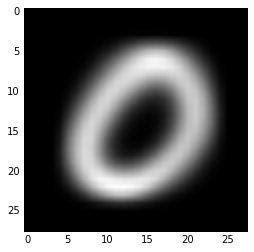

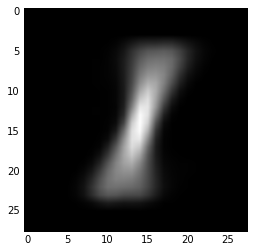

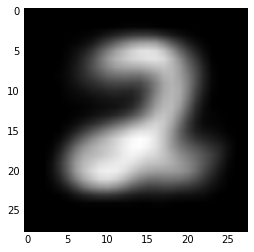

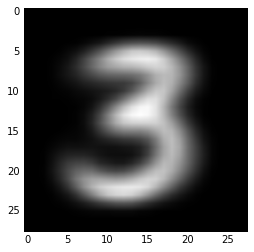

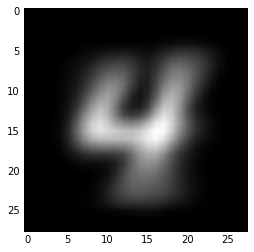

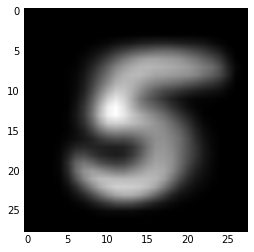

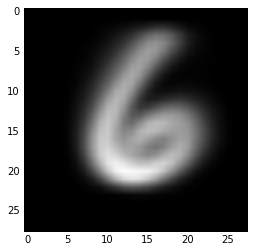

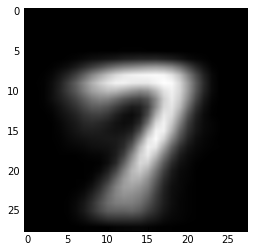

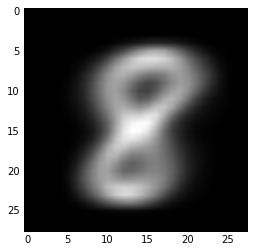

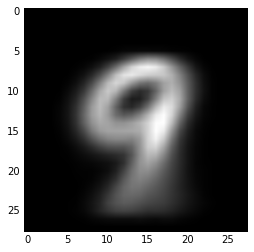

In [82]:
# Function that converts a 1D vectorized image into a (nr x nc) 2D array
def unpackcw(x, nr, nc):
    A = x.reshape(nc, nr)
    return A.T
nc = 28
nr = 28
mean_test_reshape = np.zeros((N, nc, nr))
for i in range(0,N):
    mean_test_reshape[i] = unpackcw(np.uint8(mean_test[i]), nr, nc)
    plt.figure(i)
    plt.imshow(mean_test_reshape[i], 'gray')


5) Using vector-means from part (3), implement the nearest class mean classifier. What are the training and test accuracies?

In [85]:
# calculate the norm of two vector
def vector_distance(x1, x2):
    return np.linalg.norm(x1 - x2)
# for each input vector, calculate the nearest class of digit, according to the norm
def nearest_neighbour(x, mean, N):
    min_dist = float('inf')
    min_set = -1
    for i in range(0,N):
        if vector_distance(x,mean[i]) < min_dist :
            min_dist = vector_distance(x, mean[i])
            min_set = i
    return min_set
# given N sample for test, return N elements array of nearest neighbour
def nearest_array(test, mean, count, N):
    result = np.zeros(count * N)
    for i in range(0, count * N):
        result[i] = nearest_neighbour(test[:,i],mean,N)
    return result

# calculate the accuracy of implementing nearest neighbour classifier
# input is test matrix, mean vector of each digit, and number of digit N
# return the accuracy of each digit
def nearest_accuracy(test,mean,N):
    count = test.shape[1] / N
    result = nearest_array(test,mean,count,N)
    accuracy_result = np.zeros(N)
    for i in range(N):
        for j in range(count * i,count * (i + 1)):
            if result[j] == i:
                accuracy_result[i]=accuracy_result[i] + 1./count
    return accuracy_result

# main function
accuracy_train = nearest_accuracy(train, mean_test, N)
accuracy_test = nearest_accuracy(test, mean_test, N)

print accuracy_train
print np.average(accuracy_train)
print accuracy_test
print np.average(accuracy_test)

[ 0.873  0.976  0.763  0.762  0.813  0.646  0.866  0.836  0.71   0.793]
0.8038
[ 0.86  0.96  0.66  0.78  0.75  0.63  0.77  0.8   0.65  0.81]
0.767
